# Daten filtern
Man hat es häufig mit großen Datensets zu tun, die unübersichtlich viele Werte und Infoirmationen enthalten und aus denen man nur bestimmte Informationen und Zusammenhänge extrahieren möchte. Dazu wird hier zunächst ein Beispiel mit einem übersichtlichen Datenset betrachtet, anschließend werden Informationen aus einem großen Datenset extrahiert.

Für diese Art Anwendung ist ***pandas** eine der wichtigsten Bibliotheken.

In [ ]:
import pandas as pd

### Daten einlesen

In [ ]:
#Erstelle Datensatz

# information about employees
id_number = ['128', '478', '257', '299', '175', '328', '099', '457', '144', '222']
name = ['Patrick', 'Amanda', 'Antonella', 'Eduard', 'John', 'Alejandra', 'Layton', 'Melanie', 'David', 'Lewis']
surname = ['Miller', 'Torres', 'Brown', 'Iglesias', 'Wright', 'Campos', 'Platt', 'Cavill', 'Lange', 'Bellow']
division = ['Sales', 'IT', 'IT', 'Sales', 'Marketing', 'Engineering', 'Engineering', 'Sales', 'Engineering', 'Sales']
salary = [30000, 54000, 80000, 79000, 15000, 18000, 30000, 35000, 45000, 30500]
telephone = ['7366578', '7366444', '7366120', '7366574', '7366113', '7366117', '7366777', '7366579', '7366441', '7366440']
type_contract = ['permanent', 'temporary', 'temporary', 'permanent', 'internship', 'internship', 'permanent', 'temporary', 'permanent', 'permanent']

# data frame containing information about employees
df_employees = pd.DataFrame({'name': name, 'surname': surname, 'division': division,
                             'salary': salary, 'telephone': telephone, 'type_contract': type_contract}, index=id_number)

df_employees

### Übersicht

Mit `df.head()` können zur ersten Übersicht die ersten Zeilen des Dataframes ausgegeben werden.

In [ ]:
df_employees.head()

Zunächst kann über den Befehl `df.info()` eine Zusammenfassung des DataFrames df ausgegeben werden.

In [ ]:
df_employees.info()

Mittels `df.describe()` wird eine kurze statistische Auswertung der Zeilen ausgegeben, die in einem Zahlenformat abgespeichert sind.

In [ ]:
df_employees.describe()

### Zugriff auf einzelne Zeilen, Spalten, Einträge

Um eine einzelne Spalte mit dem Spaltennamen *name* aus dem DataFrame *df* auszuwählen, können folgende Methoden verwendet werden: 

`df.name`

`df['name']`

In [ ]:
salary = df_employees.salary
salary

In [ ]:
salary = df_employees['salary']
salary

Es lassen sich auch mehrer Spalten auslesen. Dazu wird eine Liste der Spaltenlabel übergeben. Das Ergebnis ist wieder ein DataFrame.

In [ ]:
names = df_employees[['name','surname']]
names

Der Zugriff auf einzelne Zeilen erfolgt mit dem Befehl `df.loc['Zeilenname']`, falls die Zeilennamen strings sind. Dies ist im vorliegenden Beispiel der Fall:

In [ ]:
df_employees.index

In [ ]:
df_employees.loc['175']

Auch hier können wieder mehrere Zeilen ausgewählt werden: 

In [ ]:
df_employees.loc[['175','222']]

Der Zugriff auf Zeilen nach ihrer Position erfolgt mit dem Befehl `df.iloc[ZAHL]`.

In [ ]:
df_employees.iloc[0]

In [ ]:
#letzter Eintrag
df_employees.iloc[-1]

In [ ]:
df_employees.iloc[[0,5]]

Zugriff auf bestimmte Spalte und bestimmte Zeile funktioniert auch mit den .loc bzw. .iloc Befehlen: Die Position in der Tabelle wird entsprechen ausgewählt: .loc[Zeile, Spalte]

In [ ]:
df_employees

In [ ]:
df_employees.loc['257','surname']

In [ ]:
df_employees.iloc[2,1]

Mehrere Spalten zu einer Zeile:

In [ ]:
df_employees.iloc[1, [0, 1, 3]]

In [ ]:
df_employees.loc['478', ['name', 'surname', 'salary']]

Mehrere Zeilen und mehrere Spalten:

In [ ]:
df_employees.iloc[[1, 9], [0, 1, 3]]

In [ ]:
df_employees.loc[['478', '222'], ['name', 'surname', 'salary']]

Alle Zeilen bis zur vierten Zeile:

In [ ]:
df_employees.iloc[:4, [0, 1, 3]]

In [ ]:
df_employees.loc[:'299', ['name', 'surname', 'salary']]

### Filtern nach Bedingungen
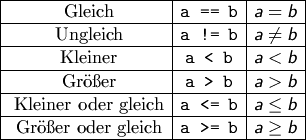

Filtern nach Angestellten, deren Gehalt größer als 45000€ ist

In [ ]:
df_employees['salary'] > 45000

Jetzt kann der Dataframe an den Stellen ausgegeben werden, an denen diese Bedingung erfüllt ist: `df[Bedingung]`

In [ ]:
df_employees[df_employees['salary'] > 45000]

Folgendermaßen können mehrere Bedingungen verknüpft werden:

In [ ]:
df_employees[(df_employees['salary'] > 45000) & (df_employees['type_contract'] == 'permanent')]

Mit mehreren Bedingungen kann auch besonders effizient und kompakt mit der `.isin()`-Methode gefiltert werden:

In [ ]:
#permanent oder temporary
df_employees[(df_employees['type_contract'] == 'temporary') | (df_employees['type_contract'] == 'permanent')]

In [ ]:
df_employees[df_employees['type_contract'].isin(['temporary', 'permanent'])]

Die `.between()`-Methode erlaubt das Filtern mit Grenzen, z.B. Gehalt zwischen 3000 und 8000 €

In [ ]:
df_employees[(df_employees['salary']>=30000)&(df_employees['salary']<=80000)]

In [ ]:
df_employees[df_employees['salary'].between(30000, 80000)]

Die standardmäßigen Methoden auf Strings funktionieren hier auch: 

In [ ]:
# select all telephone numbers that contain 57
df_employees[df_employees['telephone'].str.contains('57')]

In [ ]:
# select employees whose name starts with 'A'
df_employees[df_employees['name'].str.startswith('A')]

# Aufgabe mit großem Datensatz

https://www.listendata.com/2019/07/how-to-filter-pandas-dataframe.html

In [ ]:
#Einlesen der Daten
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/JackyP/testing/master/datasets/nycflights.csv", usecols=range(1,17))

### Überblick über die Daten

Zeige die ersten Spalten an

Zeige die Info zum Datensatz an

Beschreibe den Datensatz numerisch

Select flights details of JetBlue Airways that has 2 letters carrier code **B6** with origin from **JFK** airport

In [ ]:
dfb6jfk=df[(df.carrier=='B6')&(df.origin=='JFK')]
dfb6jfk

Um wie viele Flüge handelt es sich hier?

In [ ]:
len(dfb6jfk)

Gab es Flüge von JFK nach JFK?

In [ ]:
df[(df.origin == "JFK") & (df.dest == "JFK")]

Wie viele Flüge mit einer Entfernung >1000 Meilen gab es in den Montaten September und Oktober?

Gib die Flugnummern aller Flüge aus, die bis einschließlioch März stattgefunden haben.


Wie lang war die durschnittliche Flugdauer (airtime) dieser Flüge?

Plotte die Flugdauern der Reihe nach, nutze dafür `range(len(DATA))` um für die x-Achse eine Liste [0,1,2,3,...] zu erzeugen.

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
times = df[df.month <= 3]['air_time']

In [ ]:
plt.scatter(range(len(times)),times)

Stell die Zeiten in statistisch sinnvoller Weise dar.

In [ ]:
times

die NaN Werte müssen teilweise mit dem `.dropna()`-Befehl entfert werden.

In [ ]:
#Boxplot
plt.boxplot(times.dropna())

In [ ]:
#Histogramm
plt.hist(times.dropna(), bins = 12)

Welche Destinationen werden bei den langen Flugdauern angeflogen?

In [ ]:
df.head()

In [ ]:
# Hinweis: Nutze den .between()-Befehl für die Auswahl des entsprechenden Zeitbereiches


Um die Wiederholungen zu entfernen, kann der Befehl `.drop_duplicates()` verwendet werden.